## Decision Tree Classification with Python and Scikit-Learn

1. Import Library

In [132]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
import pandas as pd #mengubah data tidak struktur menjadi struktur
import numpy as np  #mengubah data menjadi numerik
import matplotlib.pyplot as plt #menampilkan visualisasi data
import seaborn as sns #untuk mempercantik tampilan visualisasi data
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

2. Import Dataset

In [134]:
datacar = pd.read_csv('https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv', header=None)
datacar.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


3. Exploratory data analysis

In [135]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
datacar.columns = col_names 
col_names


['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [136]:
datacar.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [137]:
datacar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [138]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(datacar[col].value_counts())   


vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [139]:
datacar['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

Cek missing value


In [140]:
datacar.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

 Declare feature vector and target variable


In [141]:
X = datacar.drop(['class'], axis=1)
y = datacar['class']


Split data into separate training and test set

In [142]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

Feature Enginering


In [143]:
#memeriksa tipe data variabel

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [144]:
#Encode adalah sebuah proses yang dilakukan untuk 
#mengamankan data dan informasi dan membuatnya menjadi tidak bisa dibaca dengan mudah jika tidak ada pengetahuan khusus. 
#mengubah data kategorik menjadi numerik

X_train.head()


,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [145]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [146]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [147]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# Decision Tree Classifier with criterion gini index

In [221]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=0)

In [222]:
# memprediksi data  
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini[0:4] 

array(['unacc', 'acc', 'unacc', 'acc'], dtype=object)

In [223]:
# hasil akurasi
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8774


Compare the train-set and test-set accuracy

In [224]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [225]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8686


Check untuk overfitting and underfitting

In [226]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8686
Test set score: 0.8774


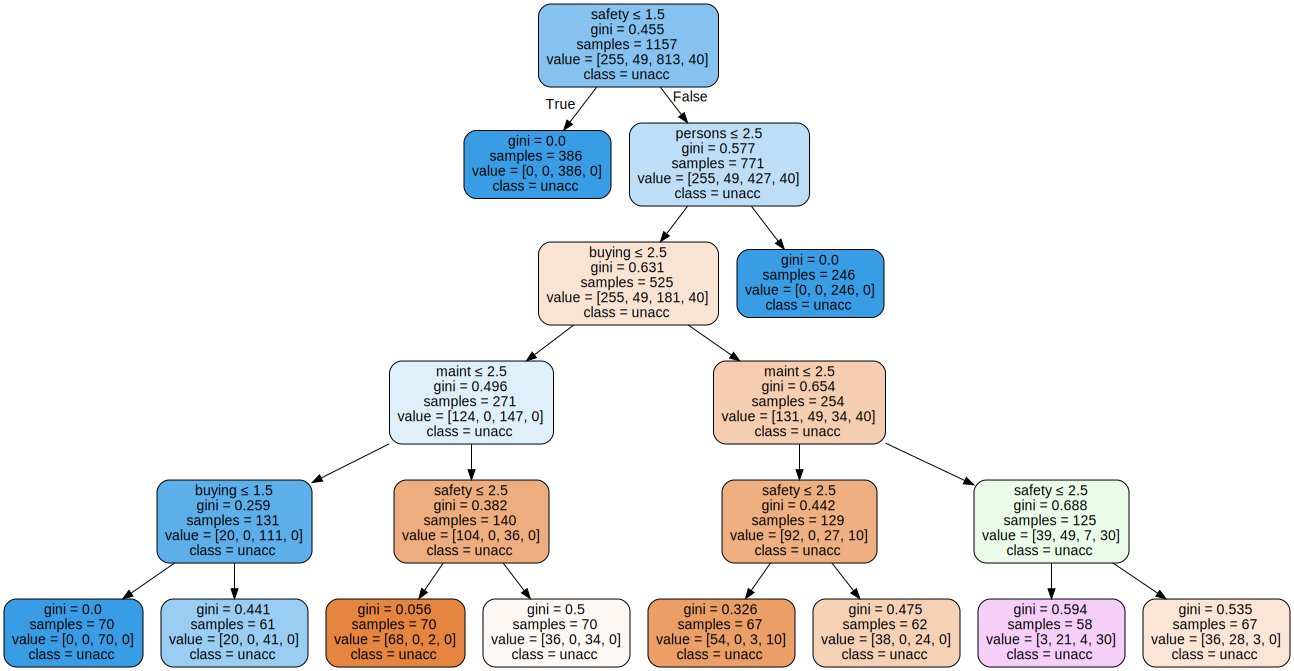

In [227]:
#Visualize decision-trees with graphviz
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph

## Decision Tree Classifier with criterion entropy

In [235]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [236]:
y_pred_en = clf_en.predict(X_test)
y_pred_en[0:4]

array(['unacc', 'acc', 'unacc', 'acc'], dtype=object)

In [237]:
# hasil akurasi
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8704


Compare the train-set and test-set accuracy

In [238]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'acc'], dtype=object)

In [232]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8341


In [239]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8686
Test set score: 0.8774


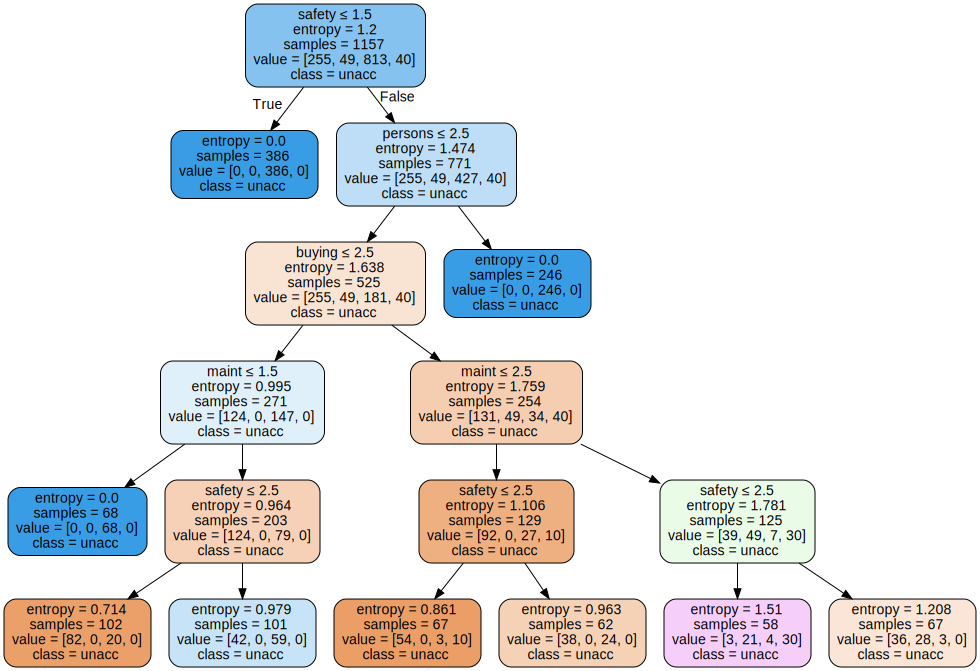

In [240]:
#Visualize decision-trees with graphviz
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 

graph

In [189]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 99   0  23   7]
 [ 11   0   0   9]
 [ 21   0 376   0]
 [  3   0   0  22]]
